YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


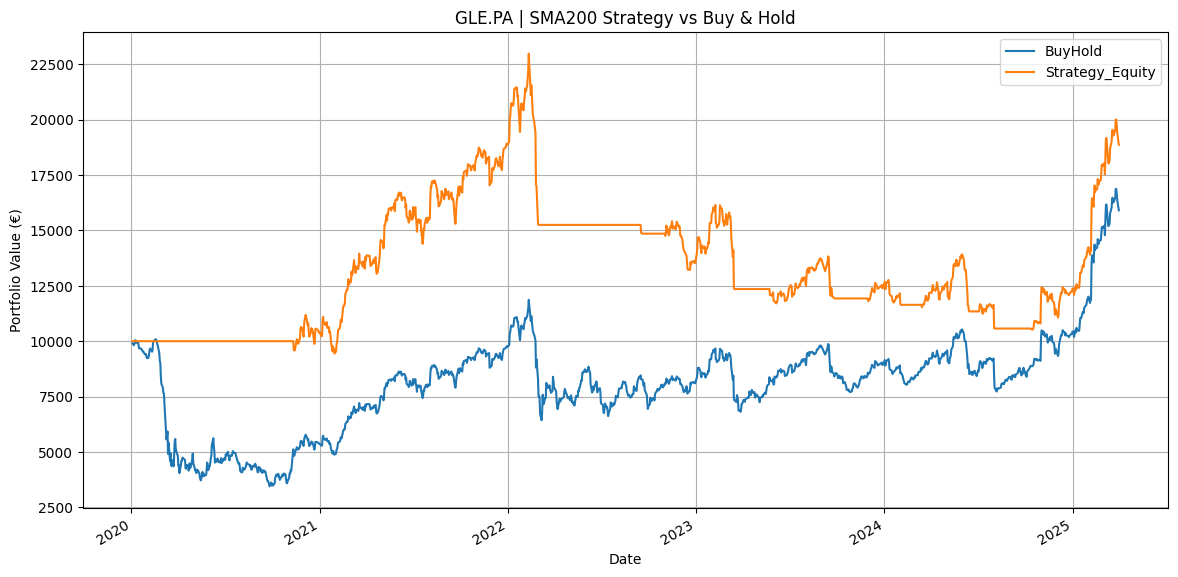

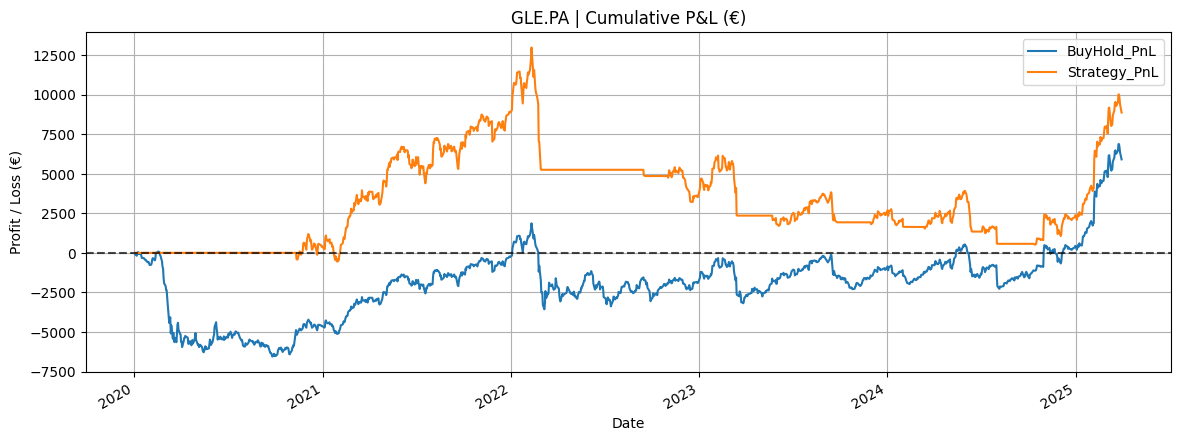

🔹 Final Strategy Value:     €18,864.69
🔹 Final Buy & Hold Value:   €15,908.86
🔹 Strategy Max Drawdown:    -54.24%
🔹 Buy & Hold Max Drawdown:  -65.86%
🔹 Strategy Sharpe Ratio:    0.60
🔹 Buy & Hold Sharpe Ratio:  0.42


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Settings
symbol = 'GLE.PA'
#symbol = 'PARP.PA'  
#symbol = 'GTT.PA'
#symbol = 'MRN.PA'
#symbol = 'JCQ.PA'
#symbol = 'SOI.PA'
#symbol = 'TKTT.PA'
#symbol = 'VCT.PA'
start_date = '2020-01-01'
end_date = '2025-04-01'
initial_balance = 10_000
fee_rate = 0.0025  # 0.25%
risk_free_rate = 0  # Can adjust if needed

# Download data
df = yf.download(symbol, start=start_date, end=end_date)
df = df[['Close']]
df.columns = ['Price']

# SMA200 Strategy
df['SMA200'] = df['Price'].rolling(window=200).mean()
df['Signal'] = 0
df.loc[df['Price'] > df['SMA200'], 'Signal'] = 1
df['Position'] = df['Signal'].shift(1).fillna(0)

# Daily returns
df['Returns'] = df['Price'].pct_change()
df['Strategy'] = df['Returns'] * df['Position']

# Fees on trades
df['Trade'] = df['Position'].diff().abs()
df['Strategy'] -= df['Trade'] * fee_rate

# Equity curves
df['BuyHold'] = (1 + df['Returns']).cumprod() * initial_balance
df['Strategy_Equity'] = (1 + df['Strategy']).cumprod() * initial_balance

# Cumulative P&L
df['BuyHold_PnL'] = df['BuyHold'] - initial_balance
df['Strategy_PnL'] = df['Strategy_Equity'] - initial_balance

# Max drawdown
def max_drawdown(series):
    roll_max = series.cummax()
    drawdown = (series - roll_max) / roll_max
    return drawdown.min()

# Sharpe ratio
def sharpe_ratio(returns, risk_free=0):
    excess_ret = returns - risk_free
    return (excess_ret.mean() / excess_ret.std()) * np.sqrt(252)

sharpe_strat = sharpe_ratio(df['Strategy'].dropna())
sharpe_hold = sharpe_ratio(df['Returns'].dropna())

# Plot equity curves
df[['BuyHold', 'Strategy_Equity']].dropna().plot(figsize=(14, 7), title=f'{symbol} | SMA200 Strategy vs Buy & Hold')
plt.ylabel('Portfolio Value (€)')
plt.grid()
plt.show()

# Plot P&L curves
df[['BuyHold_PnL', 'Strategy_PnL']].dropna().plot(figsize=(14, 5), title=f'{symbol} | Cumulative P&L (€)')
plt.ylabel('Profit / Loss (€)')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.grid()
plt.show()

# Report
print(f"🔹 Final Strategy Value:     €{df['Strategy_Equity'].iloc[-1]:,.2f}")
print(f"🔹 Final Buy & Hold Value:   €{df['BuyHold'].iloc[-1]:,.2f}")
print(f"🔹 Strategy Max Drawdown:    {max_drawdown(df['Strategy_Equity']):.2%}")
print(f"🔹 Buy & Hold Max Drawdown:  {max_drawdown(df['BuyHold']):.2%}")
print(f"🔹 Strategy Sharpe Ratio:    {sharpe_strat:.2f}")
print(f"🔹 Buy & Hold Sharpe Ratio:  {sharpe_hold:.2f}")


[*********************100%***********************]  1 of 1 completed


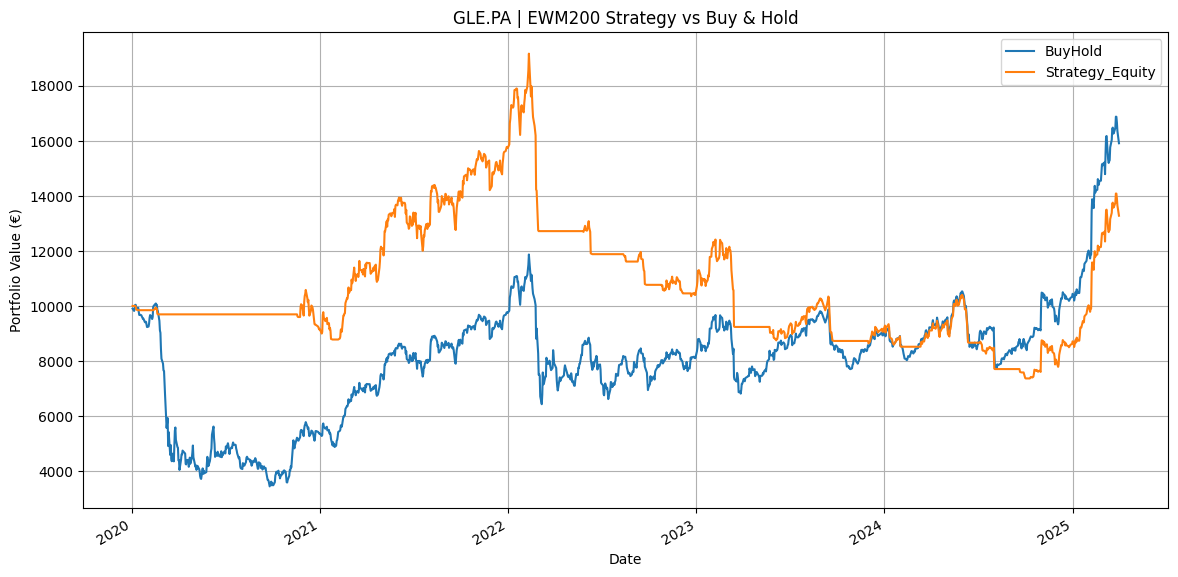

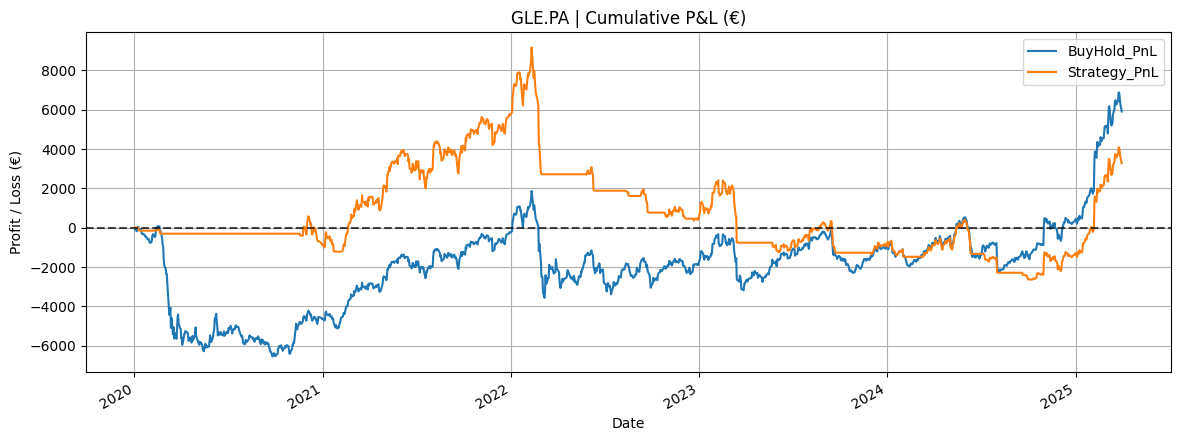

🔹 Final Strategy Value:     €13,277.26
🔹 Final Buy & Hold Value:   €15,908.86
🔹 Strategy Max Drawdown:    -61.56%
🔹 Buy & Hold Max Drawdown:  -65.86%
🔹 Strategy Sharpe Ratio:    0.34
🔹 Buy & Hold Sharpe Ratio:  0.42


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Settings
symbol = 'GLE.PA'  # Try 'CW8.PA' or any ETF
start_date = '2020-01-01'
end_date = '2025-04-01'
initial_balance = 10_000
fee_rate = 0.0025  # 0.25%
risk_free_rate = 0  # Can adjust if needed

# Download data
df = yf.download(symbol, start=start_date, end=end_date)
df = df[['Close']]
df.columns = ['Price']

# EWM200 Strategy (replacing SMA with EWM)
df['EWM200'] = df['Price'].ewm(span=200, adjust=False).mean()
df['Signal'] = 0
df.loc[df['Price'] > df['EWM200'], 'Signal'] = 1  # Buy signal when price > EWM
df['Position'] = df['Signal'].shift(1).fillna(0)

# Daily returns
df['Returns'] = df['Price'].pct_change()
df['Strategy'] = df['Returns'] * df['Position']

# Fees on trades
df['Trade'] = df['Position'].diff().abs()
df['Strategy'] -= df['Trade'] * fee_rate

# Equity curves
df['BuyHold'] = (1 + df['Returns']).cumprod() * initial_balance
df['Strategy_Equity'] = (1 + df['Strategy']).cumprod() * initial_balance

# Cumulative P&L
df['BuyHold_PnL'] = df['BuyHold'] - initial_balance
df['Strategy_PnL'] = df['Strategy_Equity'] - initial_balance

# Max drawdown
def max_drawdown(series):
    roll_max = series.cummax()
    drawdown = (series - roll_max) / roll_max
    return drawdown.min()

# Sharpe ratio
def sharpe_ratio(returns, risk_free=0):
    excess_ret = returns - risk_free
    return (excess_ret.mean() / excess_ret.std()) * np.sqrt(252)

sharpe_strat = sharpe_ratio(df['Strategy'].dropna())
sharpe_hold = sharpe_ratio(df['Returns'].dropna())

# Plot equity curves
df[['BuyHold', 'Strategy_Equity']].dropna().plot(figsize=(14, 7), title=f'{symbol} | EWM200 Strategy vs Buy & Hold')
plt.ylabel('Portfolio Value (€)')
plt.grid()
plt.show()

# Plot P&L curves
df[['BuyHold_PnL', 'Strategy_PnL']].dropna().plot(figsize=(14, 5), title=f'{symbol} | Cumulative P&L (€)')
plt.ylabel('Profit / Loss (€)')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.grid()
plt.show()

# Report
print(f"🔹 Final Strategy Value:     €{df['Strategy_Equity'].iloc[-1]:,.2f}")
print(f"🔹 Final Buy & Hold Value:   €{df['BuyHold'].iloc[-1]:,.2f}")
print(f"🔹 Strategy Max Drawdown:    {max_drawdown(df['Strategy_Equity']):.2%}")
print(f"🔹 Buy & Hold Max Drawdown:  {max_drawdown(df['BuyHold']):.2%}")
print(f"🔹 Strategy Sharpe Ratio:    {sharpe_strat:.2f}")
print(f"🔹 Buy & Hold Sharpe Ratio:  {sharpe_hold:.2f}")


[*********************100%***********************]  1 of 1 completed


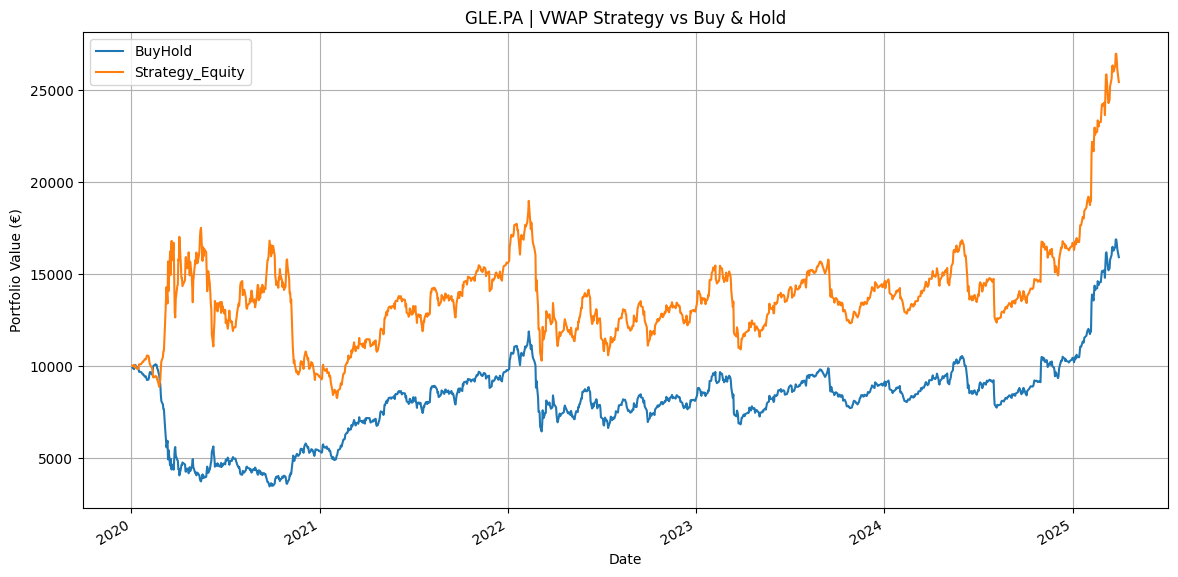

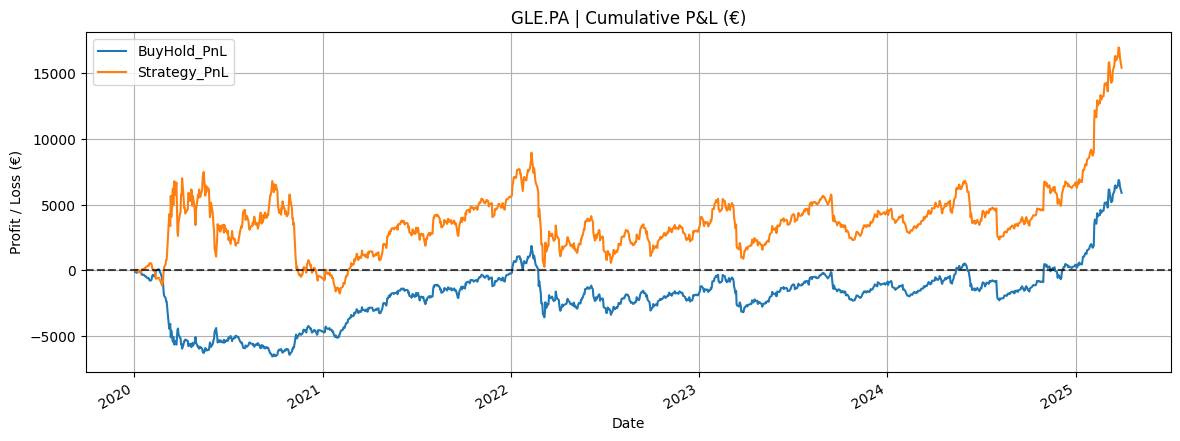

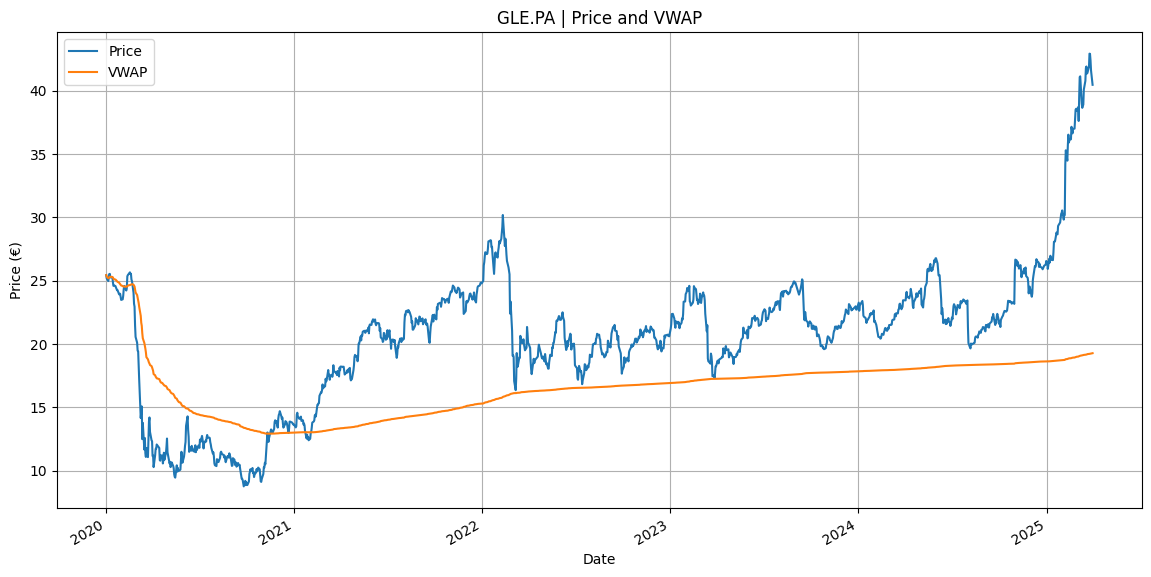

🔹 Final Strategy Value:     €25,429.52
🔹 Final Buy & Hold Value:   €15,908.86
🔹 Strategy Max Drawdown:    -52.87%
🔹 Buy & Hold Max Drawdown:  -65.86%
🔹 Strategy Sharpe Ratio:    0.63
🔹 Buy & Hold Sharpe Ratio:  0.42


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Settings
symbol ='GLE.PA'  # Example: ERA.PA, CW8.PA, etc.
start_date = '2020-01-01'
end_date = '2025-04-01'
initial_balance = 10_000
fee_rate = 0.0025  # 0.25% per trade
risk_free_rate = 0  # Adjust if needed

# Download data
df = yf.download(symbol, start=start_date, end=end_date)
df = df[['Close', 'Volume']]
df.columns = ['Price', 'Volume']

# VWAP Calculation
df['VWAP'] = (df['Volume'] * df['Price']).cumsum() / df['Volume'].cumsum()

# VWAP Strategy
df['Signal'] = 0
df.loc[df['Price'] > df['VWAP'], 'Signal'] = 1  # Buy signal when Price > VWAP
df.loc[df['Price'] < df['VWAP'], 'Signal'] = -1  # Sell signal when Price < VWAP
df['Position'] = df['Signal'].shift(1).fillna(0)  # Shift to prevent look-ahead bias

# Daily returns
df['Returns'] = df['Price'].pct_change()
df['Strategy'] = df['Returns'] * df['Position']

# Fees on trades
df['Trade'] = df['Position'].diff().abs()
df['Strategy'] -= df['Trade'] * fee_rate

# Equity curves
df['BuyHold'] = (1 + df['Returns']).cumprod() * initial_balance
df['Strategy_Equity'] = (1 + df['Strategy']).cumprod() * initial_balance

# Cumulative P&L
df['BuyHold_PnL'] = df['BuyHold'] - initial_balance
df['Strategy_PnL'] = df['Strategy_Equity'] - initial_balance

# Max drawdown
def max_drawdown(series):
    roll_max = series.cummax()
    drawdown = (series - roll_max) / roll_max
    return drawdown.min()

# Sharpe ratio
def sharpe_ratio(returns, risk_free=0):
    excess_ret = returns - risk_free
    return (excess_ret.mean() / excess_ret.std()) * np.sqrt(252)

sharpe_strat = sharpe_ratio(df['Strategy'].dropna())
sharpe_hold = sharpe_ratio(df['Returns'].dropna())

# Plot equity curves
df[['BuyHold', 'Strategy_Equity']].dropna().plot(figsize=(14, 7), title=f'{symbol} | VWAP Strategy vs Buy & Hold')
plt.ylabel('Portfolio Value (€)')
plt.grid()
plt.show()

# Plot P&L curves
df[['BuyHold_PnL', 'Strategy_PnL']].dropna().plot(figsize=(14, 5), title=f'{symbol} | Cumulative P&L (€)')
plt.ylabel('Profit / Loss (€)')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.grid()
plt.show()

# Plot VWAP
df[['Price', 'VWAP']].dropna().plot(figsize=(14, 7), title=f'{symbol} | Price and VWAP')
plt.ylabel('Price (€)')
plt.grid()
plt.show()

# Report
print(f"🔹 Final Strategy Value:     €{df['Strategy_Equity'].iloc[-1]:,.2f}")
print(f"🔹 Final Buy & Hold Value:   €{df['BuyHold'].iloc[-1]:,.2f}")
print(f"🔹 Strategy Max Drawdown:    {max_drawdown(df['Strategy_Equity']):.2%}")
print(f"🔹 Buy & Hold Max Drawdown:  {max_drawdown(df['BuyHold']):.2%}")
print(f"🔹 Strategy Sharpe Ratio:    {sharpe_strat:.2f}")
print(f"🔹 Buy & Hold Sharpe Ratio:  {sharpe_hold:.2f}")


[*********************100%***********************]  1 of 1 completed
C:\Users\karim\AppData\Local\Temp\ipykernel_41204\3625010654.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'].iloc[i] = -1  # Sell signal when Price < TWAP

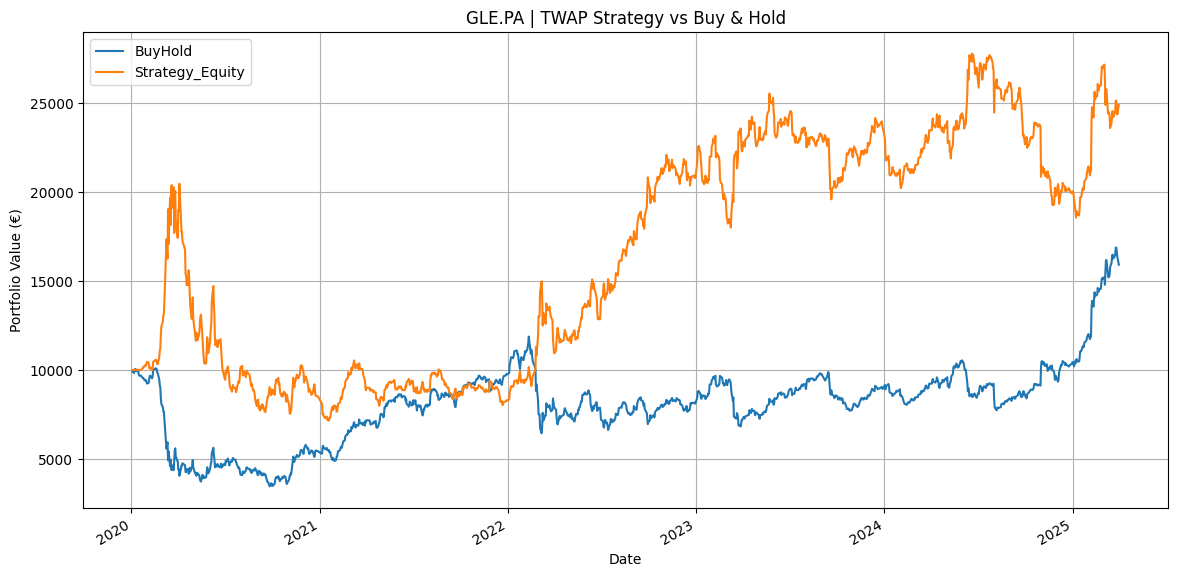

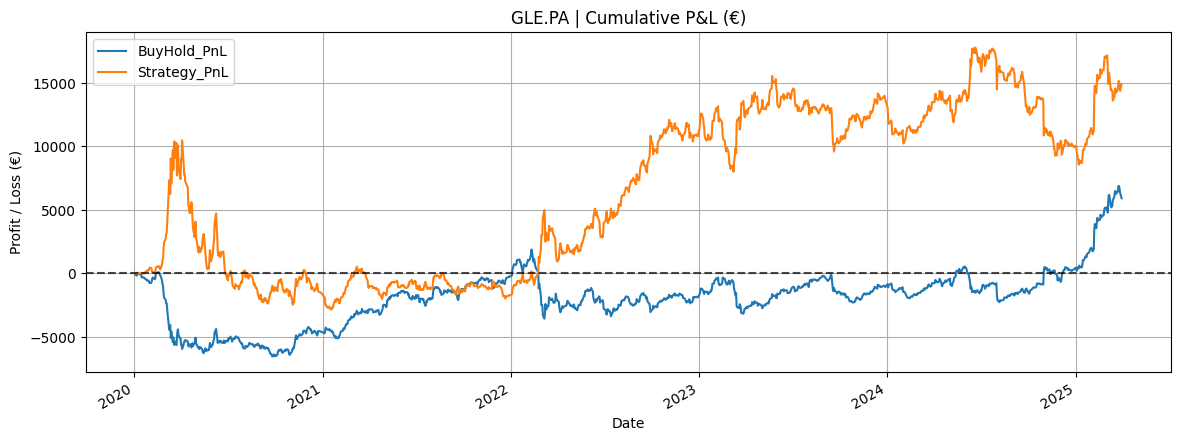

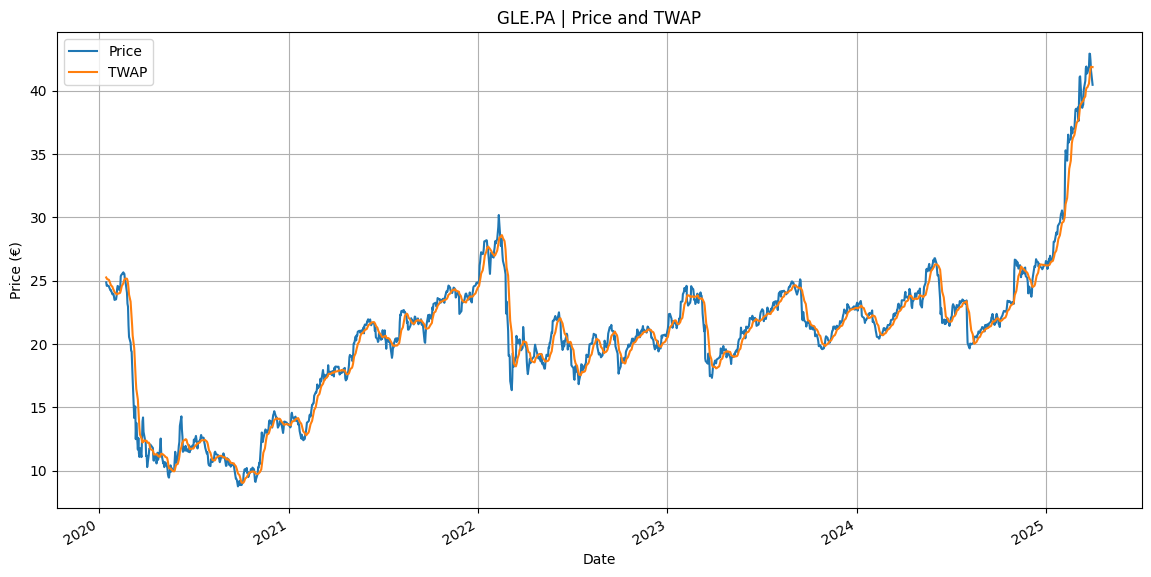

🔹 Final Strategy Value:     €24,892.51
🔹 Final Buy & Hold Value:   €15,908.86
🔹 Strategy Max Drawdown:    -65.12%
🔹 Buy & Hold Max Drawdown:  -65.86%
🔹 Strategy Sharpe Ratio:    0.61
🔹 Buy & Hold Sharpe Ratio:  0.42


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Settings
symbol = 'GLE.PA'  # Example: ERA.PA, CW8.PA, etc.
start_date = '2020-01-01'
end_date = '2025-04-01'
initial_balance = 10_000
total_order = 1000  # Total number of shares to buy/sell
fee_rate = 0.0025  # 0.25% per trade
risk_free_rate = 0  # Adjust if needed
time_period = 10  # Number of intervals (e.g., 10 time steps to execute TWAP)

# Download data
df = yf.download(symbol, start=start_date, end=end_date)
df = df[['Close']]
df.columns = ['Price']

# Simulate TWAP Execution
interval_order = total_order / time_period  # Shares per interval
df['TWAP'] = df['Price'].rolling(window=time_period).mean()  # Rolling average as a TWAP approximation
df['Signal'] = np.nan

for i in range(len(df)):
    if i >= time_period:  # TWAP signal starts only after the first time period
        if df['Price'].iloc[i] > df['TWAP'].iloc[i]:
            df['Signal'].iloc[i] = 1  # Buy signal when Price > TWAP
        elif df['Price'].iloc[i] < df['TWAP'].iloc[i]:
            df['Signal'].iloc[i] = -1  # Sell signal when Price < TWAP

df['Position'] = df['Signal'].shift(1).fillna(0)  # Shift to prevent look-ahead bias

# Daily returns
df['Returns'] = df['Price'].pct_change()
df['Strategy'] = df['Returns'] * df['Position']

# Fees on trades
df['Trade'] = df['Position'].diff().abs()
df['Strategy'] -= df['Trade'] * fee_rate

# Equity curves
df['BuyHold'] = (1 + df['Returns']).cumprod() * initial_balance
df['Strategy_Equity'] = (1 + df['Strategy']).cumprod() * initial_balance

# Cumulative P&L
df['BuyHold_PnL'] = df['BuyHold'] - initial_balance
df['Strategy_PnL'] = df['Strategy_Equity'] - initial_balance

# Max drawdown
def max_drawdown(series):
    roll_max = series.cummax()
    drawdown = (series - roll_max) / roll_max
    return drawdown.min()

# Sharpe ratio
def sharpe_ratio(returns, risk_free=0):
    excess_ret = returns - risk_free
    return (excess_ret.mean() / excess_ret.std()) * np.sqrt(252)

sharpe_strat = sharpe_ratio(df['Strategy'].dropna())
sharpe_hold = sharpe_ratio(df['Returns'].dropna())

# Plot equity curves
df[['BuyHold', 'Strategy_Equity']].dropna().plot(figsize=(14, 7), title=f'{symbol} | TWAP Strategy vs Buy & Hold')
plt.ylabel('Portfolio Value (€)')
plt.grid()
plt.show()

# Plot P&L curves
df[['BuyHold_PnL', 'Strategy_PnL']].dropna().plot(figsize=(14, 5), title=f'{symbol} | Cumulative P&L (€)')
plt.ylabel('Profit / Loss (€)')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.grid()
plt.show()

# Plot TWAP
df[['Price', 'TWAP']].dropna().plot(figsize=(14, 7), title=f'{symbol} | Price and TWAP')
plt.ylabel('Price (€)')
plt.grid()
plt.show()

# Report
print(f"🔹 Final Strategy Value:     €{df['Strategy_Equity'].iloc[-1]:,.2f}")
print(f"🔹 Final Buy & Hold Value:   €{df['BuyHold'].iloc[-1]:,.2f}")
print(f"🔹 Strategy Max Drawdown:    {max_drawdown(df['Strategy_Equity']):.2%}")
print(f"🔹 Buy & Hold Max Drawdown:  {max_drawdown(df['BuyHold']):.2%}")
print(f"🔹 Strategy Sharpe Ratio:    {sharpe_strat:.2f}")
print(f"🔹 Buy & Hold Sharpe Ratio:  {sharpe_hold:.2f}")


[*********************100%***********************]  1 of 1 completed


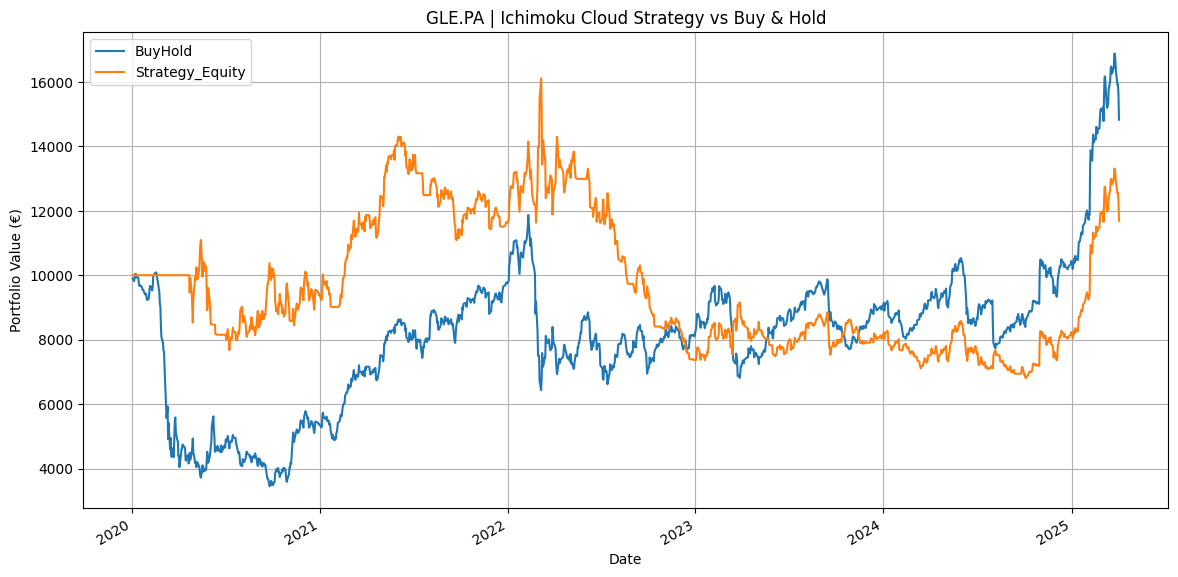

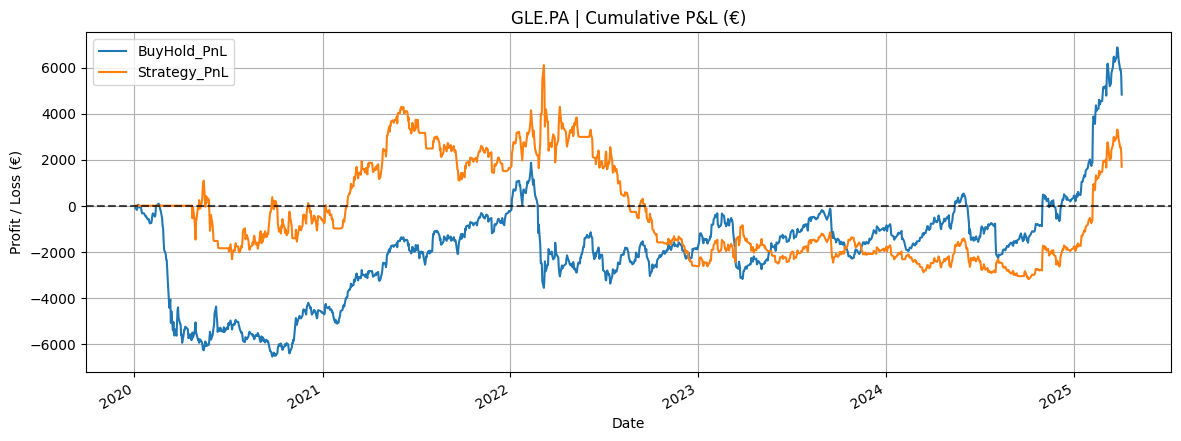

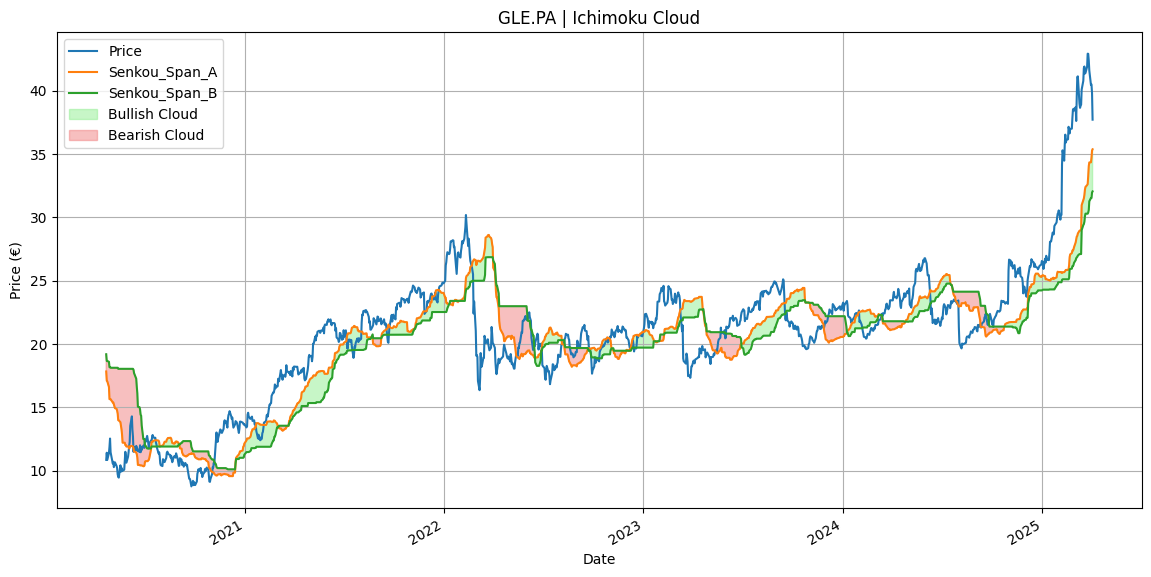

🔹 Final Strategy Value:     €11,688.89
🔹 Final Buy & Hold Value:   €14,826.87
🔹 Strategy Max Drawdown:    -57.74%
🔹 Buy & Hold Max Drawdown:  -65.86%
🔹 Strategy Sharpe Ratio:    0.25
🔹 Buy & Hold Sharpe Ratio:  0.39


In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Settings
#symbol = 'GLE.PA'  # Try 'CW8.PA' or any ETF
symbol = 'PARP.PA'  # Try 'CW8.PA' or any ETF
#symbol = 'GTT.PA'
symbol = 'MRN.PA'
#symbol = 'JCQ.PA'
#symbol = 'SOI.PA'
symbol = 'TKTT.PA'
symbol = 'VCT.PA'
symbol = 'GLE.PA'
start_date = '2020-01-01'
end_date = '2025-04-04'
initial_balance = 10_000
fee_rate = 0.0025  # 0.25% per trade
risk_free_rate = 0  # Adjust if needed

# Download data
df = yf.download(symbol, start=start_date, end=end_date)
df = df[['Close', 'High', 'Low']]
df.columns = ['Price', 'High', 'Low']

# Calculate Ichimoku Cloud Components
def calculate_ichimoku(df):
    # Tenkan-sen (Conversion Line): 9-period high + low / 2
    df['Tenkan_sen'] = (df['High'].rolling(window=9).max() + df['Low'].rolling(window=9).min()) / 2

    # Kijun-sen (Base Line): 26-period high + low / 2
    df['Kijun_sen'] = (df['High'].rolling(window=26).max() + df['Low'].rolling(window=26).min()) / 2

    # Senkou Span A (Leading Span A): (Tenkan-sen + Kijun-sen) / 2, shifted 26 periods forward
    df['Senkou_Span_A'] = ((df['Tenkan_sen'] + df['Kijun_sen']) / 2).shift(26)

    # Senkou Span B (Leading Span B): 52-period high + low / 2, shifted 26 periods forward
    df['Senkou_Span_B'] = ((df['High'].rolling(window=52).max() + df['Low'].rolling(window=52).min()) / 2).shift(26)

    # Chikou Span (Lagging Span): Price shifted 26 periods backward
    df['Chikou_Span'] = df['Price'].shift(-26)

    return df

df = calculate_ichimoku(df)

# Ichimoku Cloud Strategy
df['Signal'] = 0
df.loc[(df['Price'] > df['Senkou_Span_A']) & (df['Price'] > df['Senkou_Span_B']), 'Signal'] = 1  # Buy signal
df.loc[(df['Price'] < df['Senkou_Span_A']) & (df['Price'] < df['Senkou_Span_B']), 'Signal'] = -1  # Sell signal
df['Position'] = df['Signal'].shift(1).fillna(0)  # Shift to prevent look-ahead bias

# Daily returns
df['Returns'] = df['Price'].pct_change()
df['Strategy'] = df['Returns'] * df['Position']

# Fees on trades
df['Trade'] = df['Position'].diff().abs()
df['Strategy'] -= df['Trade'] * fee_rate

# Equity curves
df['BuyHold'] = (1 + df['Returns']).cumprod() * initial_balance
df['Strategy_Equity'] = (1 + df['Strategy']).cumprod() * initial_balance

# Cumulative P&L
df['BuyHold_PnL'] = df['BuyHold'] - initial_balance
df['Strategy_PnL'] = df['Strategy_Equity'] - initial_balance

# Max drawdown
def max_drawdown(series):
    roll_max = series.cummax()
    drawdown = (series - roll_max) / roll_max
    return drawdown.min()

# Sharpe ratio
def sharpe_ratio(returns, risk_free=0):
    excess_ret = returns - risk_free
    return (excess_ret.mean() / excess_ret.std()) * np.sqrt(252)

sharpe_strat = sharpe_ratio(df['Strategy'].dropna())
sharpe_hold = sharpe_ratio(df['Returns'].dropna())

# Plot equity curves
df[['BuyHold', 'Strategy_Equity']].dropna().plot(figsize=(14, 7), title=f'{symbol} | Ichimoku Cloud Strategy vs Buy & Hold')
plt.ylabel('Portfolio Value (€)')
plt.grid()
plt.show()

# Plot P&L curves
df[['BuyHold_PnL', 'Strategy_PnL']].dropna().plot(figsize=(14, 5), title=f'{symbol} | Cumulative P&L (€)')
plt.ylabel('Profit / Loss (€)')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.grid()
plt.show()

# Plot Ichimoku Cloud
df[['Price', 'Senkou_Span_A', 'Senkou_Span_B']].dropna().plot(figsize=(14, 7), title=f'{symbol} | Ichimoku Cloud')
plt.fill_between(df.index, df['Senkou_Span_A'], df['Senkou_Span_B'], where=df['Senkou_Span_A'] >= df['Senkou_Span_B'], color='lightgreen', alpha=0.5, label='Bullish Cloud')
plt.fill_between(df.index, df['Senkou_Span_A'], df['Senkou_Span_B'], where=df['Senkou_Span_A'] < df['Senkou_Span_B'], color='lightcoral', alpha=0.5, label='Bearish Cloud')
plt.ylabel('Price (€)')
plt.legend()
plt.grid()
plt.show()

# Report
print(f"🔹 Final Strategy Value:     €{df['Strategy_Equity'].iloc[-1]:,.2f}")
print(f"🔹 Final Buy & Hold Value:   €{df['BuyHold'].iloc[-1]:,.2f}")
print(f"🔹 Strategy Max Drawdown:    {max_drawdown(df['Strategy_Equity']):.2%}")
print(f"🔹 Buy & Hold Max Drawdown:  {max_drawdown(df['BuyHold']):.2%}")
print(f"🔹 Strategy Sharpe Ratio:    {sharpe_strat:.2f}")
print(f"🔹 Buy & Hold Sharpe Ratio:  {sharpe_hold:.2f}")


[*********************100%***********************]  1 of 1 completed
C:\Users\karim\AppData\Local\Temp\ipykernel_41204\1281775333.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ep = df['Low'][0]  # Extreme Price (Low for uptrend, High for downtrend)
C:\Users\karim\AppData\Local\Temp\ipykernel_41204\1281775333.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sar = df['High'][0]  # Start with High for uptrend
C:\Users\karim\AppData\Local\Temp\ipykernel_41204\1281775333.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as

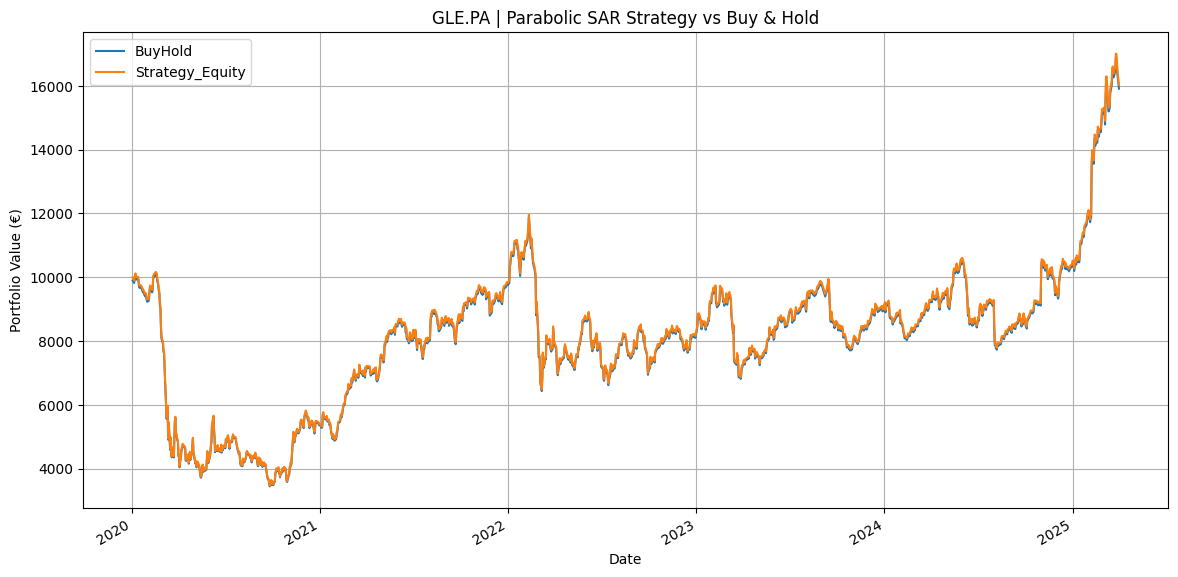

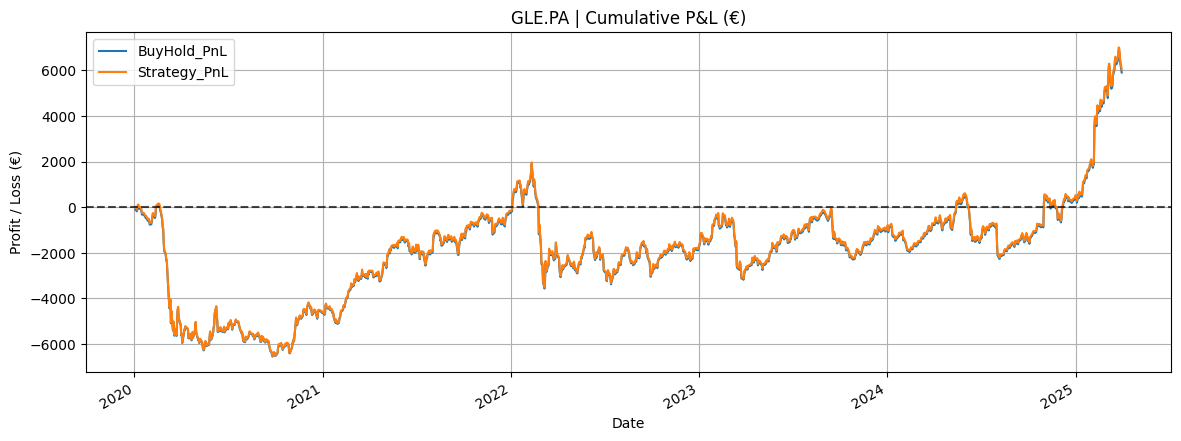

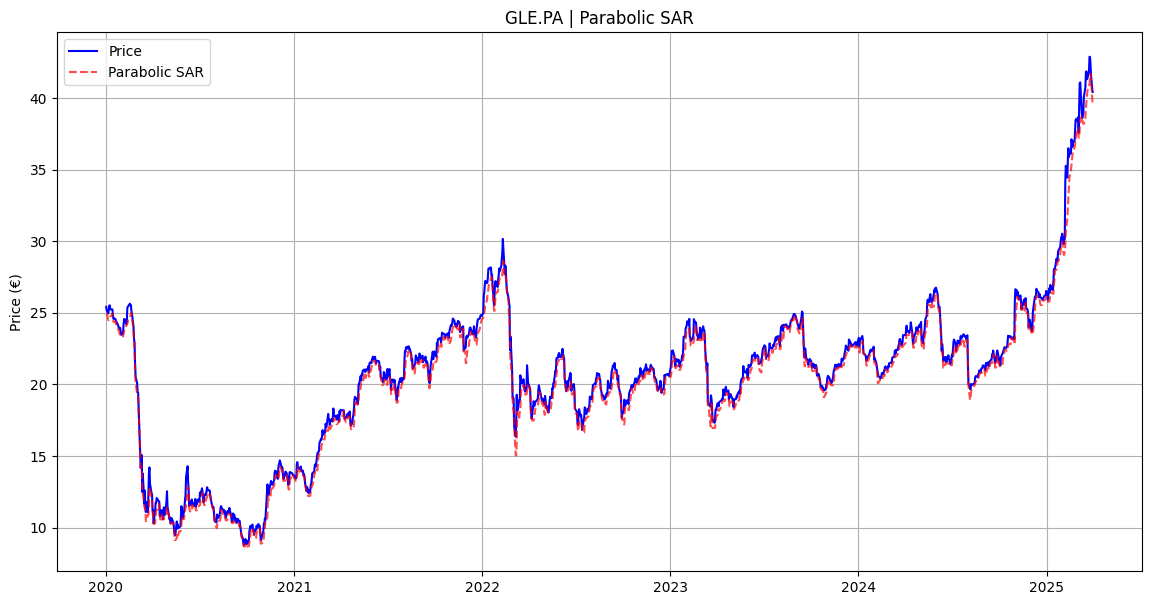

🔹 Final Strategy Value:     €16,030.82
🔹 Final Buy & Hold Value:   €15,908.86
🔹 Strategy Max Drawdown:    -65.86%
🔹 Buy & Hold Max Drawdown:  -65.86%
🔹 Strategy Sharpe Ratio:    0.42
🔹 Buy & Hold Sharpe Ratio:  0.42


In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Settings
#symbol = 'GLE.PA'  # Try 'CW8.PA' or any ETF
symbol = 'PARP.PA'  # Try 'CW8.PA' or any ETF
#symbol = 'GTT.PA'
symbol = 'MRN.PA'
#symbol = 'JCQ.PA'
#symbol = 'SOI.PA'
symbol = 'TKTT.PA'
symbol = 'VCT.PA'
symbol = "GLE.PA"
start_date = '2020-01-01'
end_date = '2025-04-01'
initial_balance = 10_000
fee_rate = 0.0025  # 0.25% per trade
risk_free_rate = 0  # Adjust if needed

# Download data
df = yf.download(symbol, start=start_date, end=end_date)
df = df[['High', 'Low', 'Close']]
df.columns = ['High', 'Low', 'Price']

# Parabolic SAR Calculation
def calculate_parabolic_sar(df, step=0.02, max_step=0.2):
    df['SAR'] = np.nan
    df['Signal'] = 0
    
    # Initialize variables
    uptrend = True
    af = step  # Acceleration Factor
    ep = df['Low'][0]  # Extreme Price (Low for uptrend, High for downtrend)
    sar = df['High'][0]  # Start with High for uptrend
    
    for i in range(1, len(df)):
        prev_sar = sar
        prev_ep = ep
        sar = prev_sar + af * (prev_ep - prev_sar)
        
        # Adjust SAR
        if uptrend:
            sar = min(sar, df['Low'][i-1], df['Low'][i])
            if df['Price'][i] < sar:  # Reversal
                uptrend = False
                sar = prev_ep
                af = step
                ep = df['High'][i]
                df['Signal'][i] = -1  # Sell Signal
            else:
                df['Signal'][i] = 1  # Buy Signal
                if df['High'][i] > prev_ep:
                    ep = df['High'][i]
                    af = min(af + step, max_step)
        else:
            sar = max(sar, df['High'][i-1], df['High'][i])
            if df['Price'][i] > sar:  # Reversal
                uptrend = True
                sar = prev_ep
                af = step
                ep = df['Low'][i]
                df['Signal'][i] = 1  # Buy Signal
            else:
                df['Signal'][i] = -1  # Sell Signal
                if df['Low'][i] < prev_ep:
                    ep = df['Low'][i]
                    af = min(af + step, max_step)
                    
        df['SAR'][i] = sar
    
    return df

df = calculate_parabolic_sar(df)

# Parabolic SAR Strategy
df['Position'] = df['Signal'].shift(1).fillna(0)

# Daily returns
df['Returns'] = df['Price'].pct_change()
df['Strategy'] = df['Returns'] * df['Position']

# Fees on trades
df['Trade'] = df['Position'].diff().abs()
df['Strategy'] -= df['Trade'] * fee_rate

# Equity curves
df['BuyHold'] = (1 + df['Returns']).cumprod() * initial_balance
df['Strategy_Equity'] = (1 + df['Strategy']).cumprod() * initial_balance

# Cumulative P&L
df['BuyHold_PnL'] = df['BuyHold'] - initial_balance
df['Strategy_PnL'] = df['Strategy_Equity'] - initial_balance

# Max drawdown
def max_drawdown(series):
    roll_max = series.cummax()
    drawdown = (series - roll_max) / roll_max
    return drawdown.min()

# Sharpe ratio
def sharpe_ratio(returns, risk_free=0):
    excess_ret = returns - risk_free
    return (excess_ret.mean() / excess_ret.std()) * np.sqrt(252)

sharpe_strat = sharpe_ratio(df['Strategy'].dropna())
sharpe_hold = sharpe_ratio(df['Returns'].dropna())

# Plot equity curves
df[['BuyHold', 'Strategy_Equity']].dropna().plot(figsize=(14, 7), title=f'{symbol} | Parabolic SAR Strategy vs Buy & Hold')
plt.ylabel('Portfolio Value (€)')
plt.grid()
plt.show()

# Plot P&L curves
df[['BuyHold_PnL', 'Strategy_PnL']].dropna().plot(figsize=(14, 5), title=f'{symbol} | Cumulative P&L (€)')
plt.ylabel('Profit / Loss (€)')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.grid()
plt.show()

# Plot Parabolic SAR
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Price'], label='Price', color='blue')
plt.plot(df.index, df['SAR'], label='Parabolic SAR', color='red', linestyle='--', alpha=0.7)
plt.title(f'{symbol} | Parabolic SAR')
plt.ylabel('Price (€)')
plt.legend()
plt.grid()
plt.show()

# Report
print(f"🔹 Final Strategy Value:     €{df['Strategy_Equity'].iloc[-1]:,.2f}")
print(f"🔹 Final Buy & Hold Value:   €{df['BuyHold'].iloc[-1]:,.2f}")
print(f"🔹 Strategy Max Drawdown:    {max_drawdown(df['Strategy_Equity']):.2%}")
print(f"🔹 Buy & Hold Max Drawdown:  {max_drawdown(df['BuyHold']):.2%}")
print(f"🔹 Strategy Sharpe Ratio:    {sharpe_strat:.2f}")
print(f"🔹 Buy & Hold Sharpe Ratio:  {sharpe_hold:.2f}")


[*********************100%***********************]  1 of 1 completed


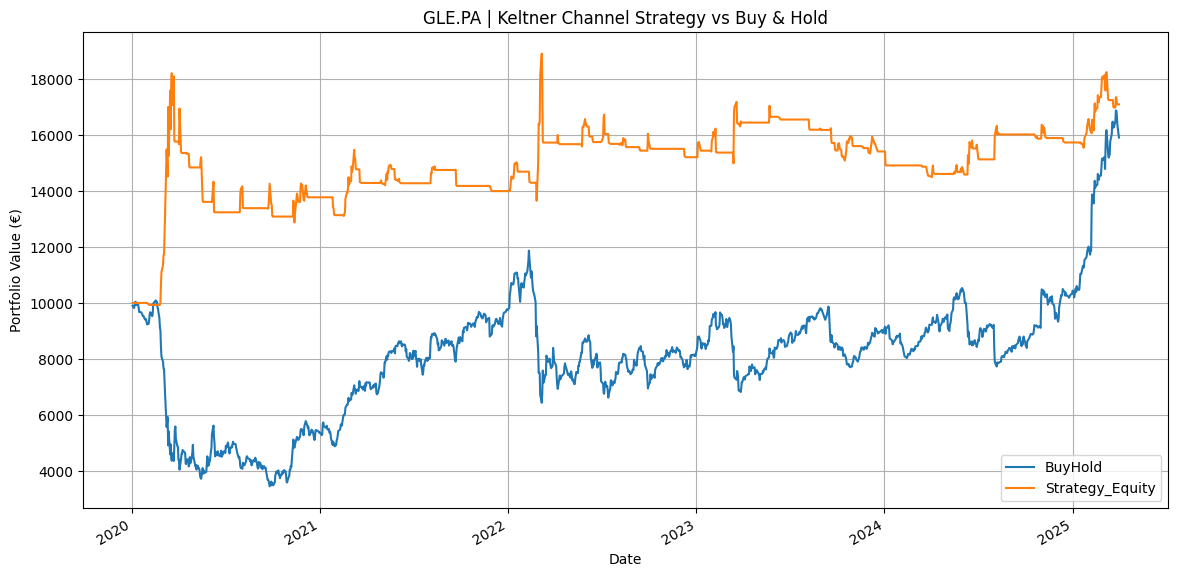

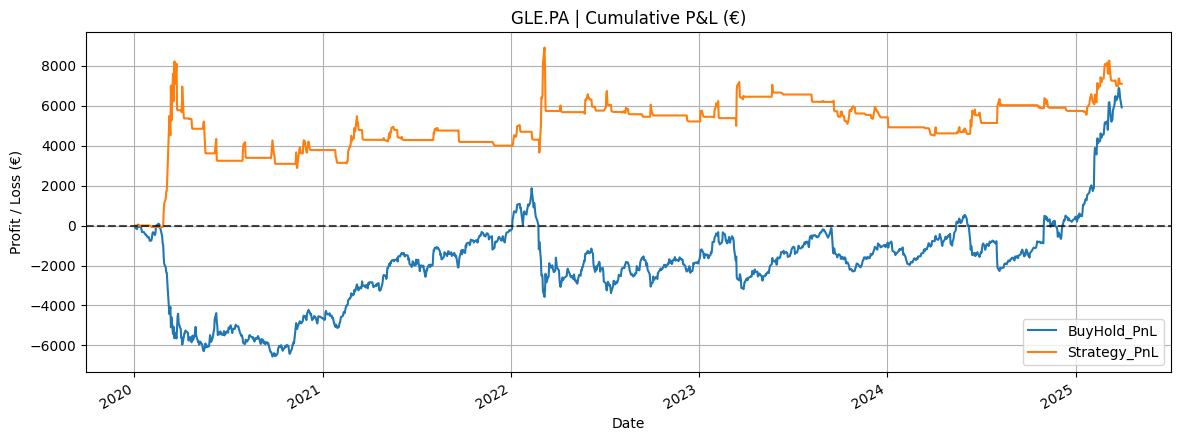

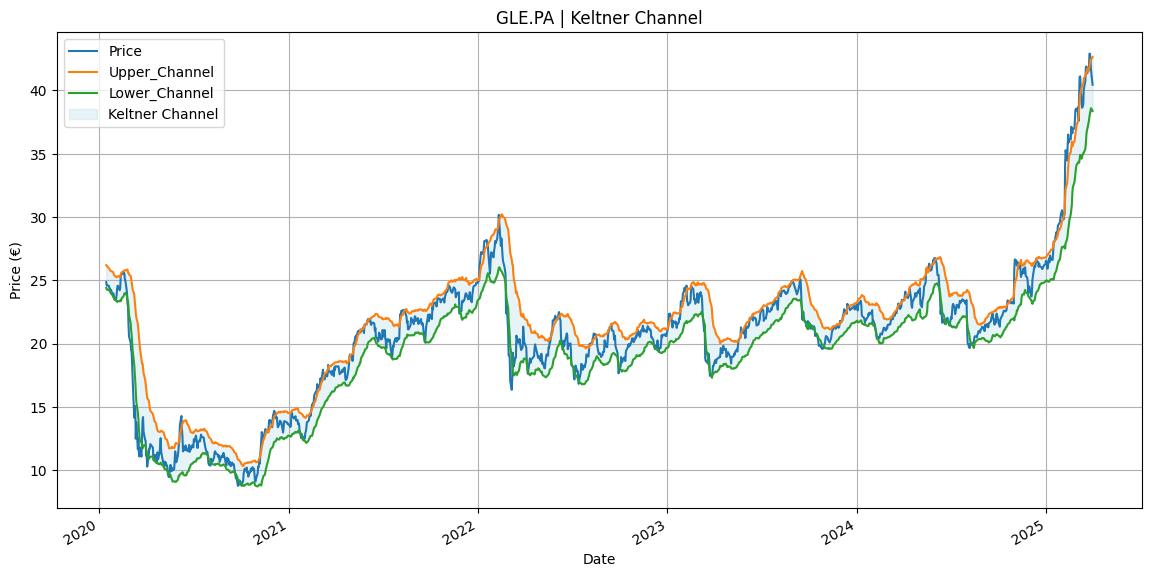

🔹 Final Strategy Value:     €17,092.10
🔹 Final Buy & Hold Value:   €15,908.86
🔹 Strategy Max Drawdown:    -29.29%
🔹 Buy & Hold Max Drawdown:  -65.86%
🔹 Strategy Sharpe Ratio:    0.52
🔹 Buy & Hold Sharpe Ratio:  0.42


In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Settings
symbol = 'GLE.PA'  # Example: ERA.PA, CW8.PA, etc.
start_date = '2020-01-01'
end_date = '2025-04-01'
initial_balance = 10_000
fee_rate = 0.0025  # 0.25% per trade
risk_free_rate = 0  # Adjust if needed
ema_period = 20  # Period for EMA in the Keltner Channel
atr_period = 10  # Period for ATR in the Keltner Channel
multiplier = 2  # Multiplier for ATR to set channel width

# Download data
df = yf.download(symbol, start=start_date, end=end_date)
df = df[['High', 'Low', 'Close']]
df.columns = ['High', 'Low', 'Price']

# Average True Range (ATR) Calculation
def calculate_atr(df, period):
    df['TR1'] = df['High'] - df['Low']
    df['TR2'] = abs(df['High'] - df['Price'].shift(1))
    df['TR3'] = abs(df['Low'] - df['Price'].shift(1))
    df['True_Range'] = df[['TR1', 'TR2', 'TR3']].max(axis=1)
    df['ATR'] = df['True_Range'].rolling(window=period).mean()
    return df

df = calculate_atr(df, atr_period)

# Keltner Channel Calculation
df['EMA'] = df['Price'].ewm(span=ema_period, adjust=False).mean()
df['Upper_Channel'] = df['EMA'] + (multiplier * df['ATR'])
df['Lower_Channel'] = df['EMA'] - (multiplier * df['ATR'])

# Keltner Channel Strategy
df['Signal'] = 0
df.loc[df['Price'] > df['Upper_Channel'], 'Signal'] = 1  # Buy signal
df.loc[df['Price'] < df['Lower_Channel'], 'Signal'] = -1  # Sell signal
df['Position'] = df['Signal'].shift(1).fillna(0)  # Shift to prevent look-ahead bias

# Daily returns
df['Returns'] = df['Price'].pct_change()
df['Strategy'] = df['Returns'] * df['Position']

# Fees on trades
df['Trade'] = df['Position'].diff().abs()
df['Strategy'] -= df['Trade'] * fee_rate

# Equity curves
df['BuyHold'] = (1 + df['Returns']).cumprod() * initial_balance
df['Strategy_Equity'] = (1 + df['Strategy']).cumprod() * initial_balance

# Cumulative P&L
df['BuyHold_PnL'] = df['BuyHold'] - initial_balance
df['Strategy_PnL'] = df['Strategy_Equity'] - initial_balance

# Max drawdown
def max_drawdown(series):
    roll_max = series.cummax()
    drawdown = (series - roll_max) / roll_max
    return drawdown.min()

# Sharpe ratio
def sharpe_ratio(returns, risk_free=0):
    excess_ret = returns - risk_free
    return (excess_ret.mean() / excess_ret.std()) * np.sqrt(252)

sharpe_strat = sharpe_ratio(df['Strategy'].dropna())
sharpe_hold = sharpe_ratio(df['Returns'].dropna())

# Plot equity curves
df[['BuyHold', 'Strategy_Equity']].dropna().plot(figsize=(14, 7), title=f'{symbol} | Keltner Channel Strategy vs Buy & Hold')
plt.ylabel('Portfolio Value (€)')
plt.grid()
plt.show()

# Plot P&L curves
df[['BuyHold_PnL', 'Strategy_PnL']].dropna().plot(figsize=(14, 5), title=f'{symbol} | Cumulative P&L (€)')
plt.ylabel('Profit / Loss (€)')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.grid()
plt.show()

# Plot Keltner Channel
df[['Price', 'Upper_Channel', 'Lower_Channel']].dropna().plot(figsize=(14, 7), title=f'{symbol} | Keltner Channel')
plt.fill_between(df.index, df['Lower_Channel'], df['Upper_Channel'], color='lightblue', alpha=0.3, label='Keltner Channel')
plt.ylabel('Price (€)')
plt.legend()
plt.grid()
plt.show()

# Report
print(f"🔹 Final Strategy Value:     €{df['Strategy_Equity'].iloc[-1]:,.2f}")
print(f"🔹 Final Buy & Hold Value:   €{df['BuyHold'].iloc[-1]:,.2f}")
print(f"🔹 Strategy Max Drawdown:    {max_drawdown(df['Strategy_Equity']):.2%}")
print(f"🔹 Buy & Hold Max Drawdown:  {max_drawdown(df['BuyHold']):.2%}")
print(f"🔹 Strategy Sharpe Ratio:    {sharpe_strat:.2f}")
print(f"🔹 Buy & Hold Sharpe Ratio:  {sharpe_hold:.2f}")
